<a href="https://colab.research.google.com/github/luccidomingues/Regression-Model-vs-Y-scrambled-Model/blob/main/Y_Scrambling_BeerConsumption_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Y-Scrambling for Modeling of São Paulo Beer Consumption Dataset**


*Y column is scrambled, shuffled or permutated. In plain English: "change the order of".*


# Read in data

In [ ]:
import pandas as pd

In [ ]:
projects = 'Consumo_cerveja.csv'
dataset = pd.read_csv(projects,sep=';')
dataset

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900
...,...,...,...,...,...,...,...
360,27/12/2015,24.00,21.1,28.2,13.6,1,32307
361,28/12/2015,22.64,21.1,26.7,0.0,0,26095
362,29/12/2015,21.68,20.3,24.1,10.3,0,22309
363,30/12/2015,21.38,19.3,22.4,6.3,0,20467


# Y-Scrambling

In [ ]:
# Data set
X = dataset.drop(['data','temp_media','temp_min','consumo'], axis=1)
Y = dataset.iloc[:,6]
X

# X.isna().sum() 
# X.dropna(inplace=True)
# Y.dropna(inplace=True)

,temp_max,chuva,fds
0,32.5,0.0,0
1,33.5,0.0,0
2,29.9,0.0,1
3,28.6,1.2,1
4,28.3,0.0,0
...,...,...,...
360,28.2,13.6,1
361,26.7,0.0,0
362,24.1,10.3,0
363,22.4,6.3,0


In [ ]:
Y.sample(frac=1, replace=False, random_state=0)
Y

0      25461
1      28972
2      30814
3      29799
4      28900
       ...  
360    32307
361    26095
362    22309
363    20467
364    22446
Name: consumo, Length: 365, dtype: int64

# Original vs Y-scrambled model

### Model from original X-Y pairs

In [ ]:
# Model from original X-Y pairs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Luciano code
from sklearn.metrics import accuracy_score

# Data set
# X = dataset.drop(['logS'], axis=1)
# Y = dataset.iloc[:,-1]

# Data split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Y-Shuffling


# Model building
model = LinearRegression()
model.fit(X_train, Y_train)
# Make prediction
Y_train_pred = model.predict(X_train)
# Compute R2 score
r2a = r2_score(Y_train, Y_train_pred)

# Print R2 score
print('R² = %s' % r2a.round(2))

# asd = accuracy_score(Y_train, Y_train_pred)
# print('Accuracy = %s' % ac_score.round(2))




R² = 0.73


Text(0.5, 0, 'Consumption')

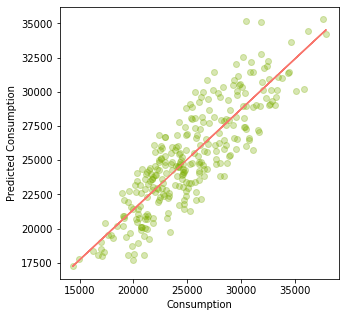

In [ ]:
# Plot of predicted vs actual
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=Y_train, y=Y_train_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y_train, Y_train_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted Consumption')
plt.xlabel('Consumption')


### Build Y-scrambled models

In [ ]:
# Build Y-scrambled models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

r2_train_list = []

# Data set
# X = dataset.drop(['logS'], axis=1)
# Y = dataset.iloc[:,-1]
X = dataset.drop(['data','temp_media','temp_min','consumo'], axis=1)
Y = dataset.iloc[:,6]

# Data split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

for i in range(1000):
  # Y-Shuffling
  Y_train1 = Y_train.sample(frac=1, replace=False, random_state=i)
  # Model building
  model = LinearRegression()
  model.fit(X_train, Y_train1)
  # Make prediction
  Y_train_pred = model.predict(X_train)
  # Compute R2 score
  r2b = r2_score(Y_train1, Y_train_pred)
  r2_train_list.append(r2b)
# Print R2 score
r2_train_list

[0.010187205136028443,
 0.013696908936467023,
 0.0033265794796188963,
 0.01036526424270301,
 0.00834350969027331,
 0.010078997938981149,
 0.008417745187475068,
 0.0013908802022830624,
 0.011362971156406831,
 0.014117648939718008,
 0.0014422040951067583,
 0.011235247540831717,
 0.021409918357216173,
 0.011653451192476072,
 0.0005973863432514603,
 0.015375403200041715,
 0.01923753374440318,
 0.002100565256797471,
 0.0401077548602381,
 0.0006537939050355046,
 0.002398608128915458,
 0.016665270767936224,
 0.0018488289212745812,
 0.0018823839234354267,
 0.0028613256284856226,
 0.005390698475830846,
 0.017135661501866073,
 0.0031998852569966596,
 0.001986486776676899,
 0.003511092632326962,
 0.009367585051938354,
 0.014663904409476958,
 0.013177027116671125,
 0.014400095456794215,
 0.03243733557110062,
 0.010914878360891,
 0.023413622602101447,
 0.022825076658193888,
 0.002160292790340246,
 0.01989595512434361,
 0.025602438567956964,
 0.0033447087695218647,
 0.005917455006276384,
 0.00285983

[(0.0, 1.0)]

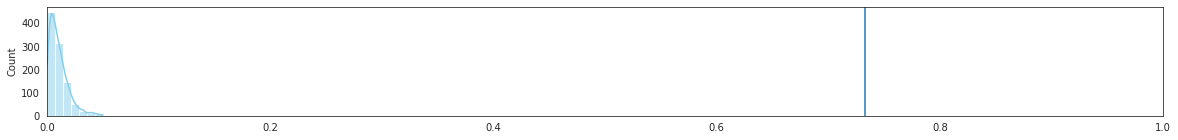

In [ ]:
# Histogram plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("white")
plt.figure(figsize = (20, 2)) 

ax = sns.histplot(data=r2_train_list, color="skyblue", kde=True, bins = 7)
plt.axvline(r2a)
ax.set(xlim=(0, 1))